# Neste notebook estarei buscando:

Top 5 maiores contratos (globais e por empresa).

Top 5 empresas que mais ganharam no geral

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
sns.set(style = 'whitegrid')

ARQ = '../base_dados/bd_2.csv'

df = pd.read_csv(
    ARQ,
    sep = ';',
    decimal = ',',
    encoding = 'latin1'
)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

df['pp_consorcio'] = df['pp_consorcio'].round(4)

### Top 5 maiores contratos globais:

Aqui estamos analisando os **contratos globais**.

O gráfico a seguir exibe os **Top 5** maiores **contratos**.

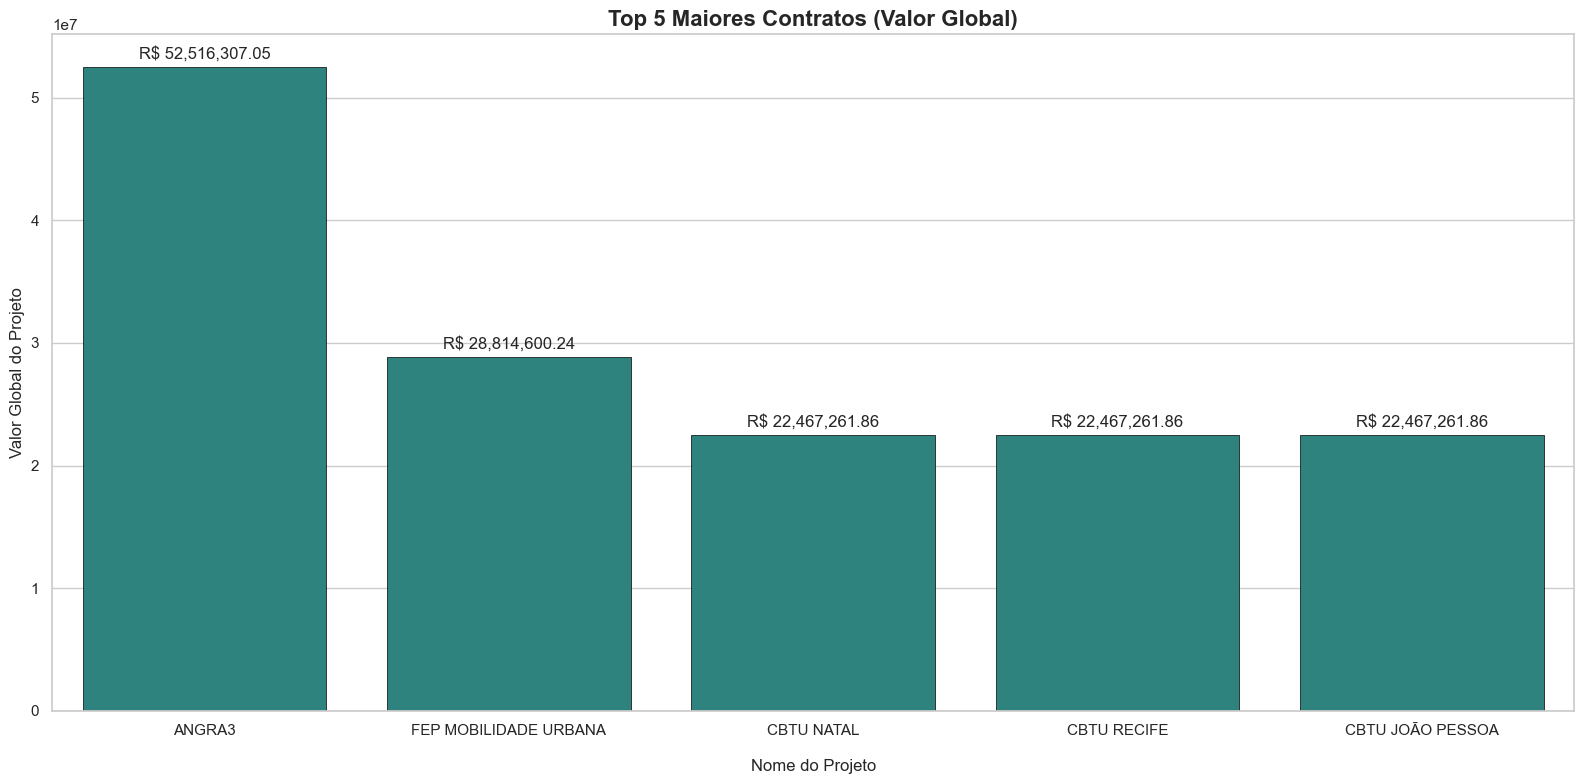

In [13]:
# Criando uma cópia para não alterar o DataFrame original
df_globais = df.copy()

df_globais.drop_duplicates(subset=['numero_srm', 'numero_ocs', 'nome_projeto'], inplace=True, keep='first')
top_5_globais = df_globais.sort_values(by='valor_global_contrato_reais', ascending=False).head(6)

# print(top_5_globais[['nome_projeto', 'cliente', 'esfera_cliente', 'valor_global_contrato_reais']])

plt.figure(figsize=(16, 8))

grafico = sns.barplot(
    x='nome_projeto',
    y='valor_global_contrato_reais',
    data=top_5_globais,
    hue='esfera_cliente',
    palette='viridis',
    edgecolor='black',
    linewidth=0.5,
    errorbar=None
)

for container in grafico.containers:
    grafico.bar_label(container, fmt='R$ {:,.2f}', padding=4)

grafico.legend_.remove()
plt.title('Top 5 Maiores Contratos (Valor Global)', fontsize=16, fontweight='bold')
plt.ylabel('Valor Global do Projeto', fontsize=12)
plt.xlabel('Nome do Projeto', fontsize=12, labelpad=15)
plt.tight_layout() 
plt.show()

### Top 5 maiores contratos por empresa:

Aqui estamos analisando os **contratos por empresa**.

O gráfico a seguir exibe os **Top 5** maiores **contratos por empresa**.

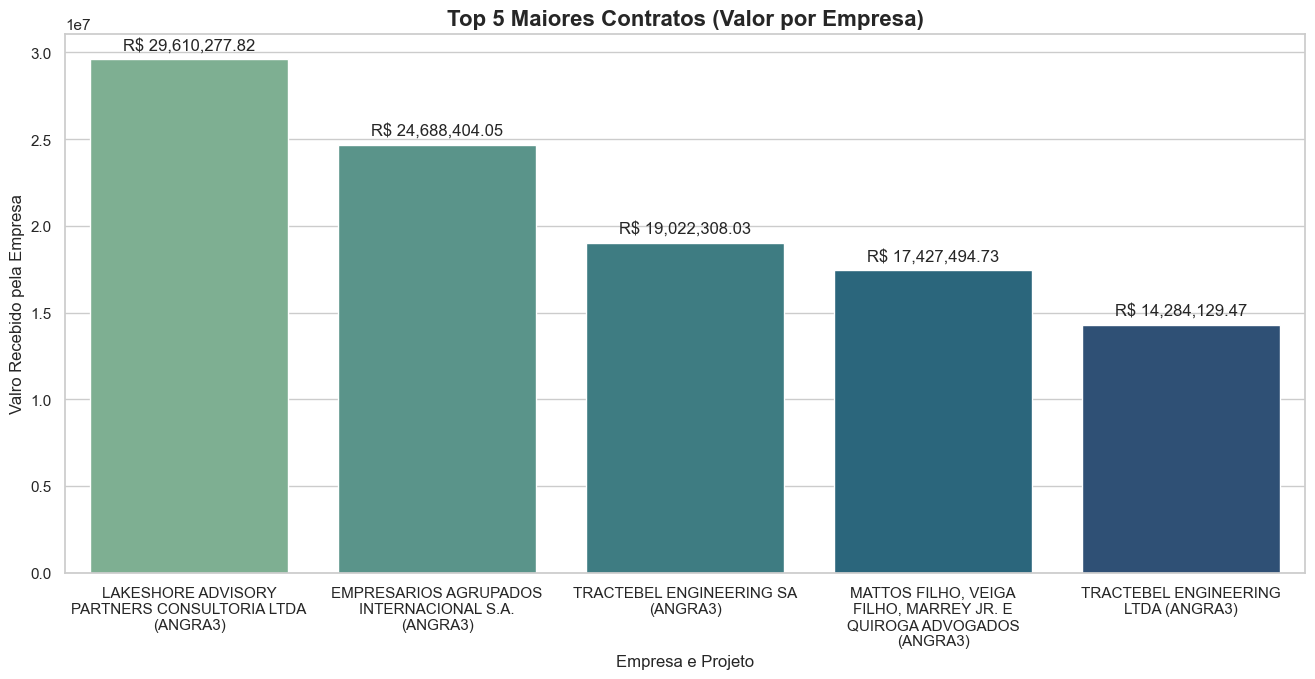

In [14]:
plt.figure(figsize=(16, 7))

top_5_por_empresa = df.sort_values(by='valor_recebido_por_empresa', ascending=False).head(5)
top_5_por_empresa['projeto_empresa'] = top_5_por_empresa['empresa'] + ' (' + top_5_por_empresa['nome_projeto'] + ')'

labels_quebrados = [ '\n'.join(textwrap.wrap(label, width=25)) for label in top_5_por_empresa['projeto_empresa'] ]

grafico = sns.barplot(
    x=labels_quebrados, 
    y='valor_recebido_por_empresa', 
    data=top_5_por_empresa, 
    hue='projeto_empresa',
    palette='crest'
)

for container in grafico.containers:
    grafico.bar_label(container, fmt='R$ {:,.2f}', padding=5)

grafico.legend_.remove()
plt.title('Top 5 Maiores Contratos (Valor por Empresa)', fontsize=16, fontweight='bold')
plt.ylabel('Valro Recebido pela Empresa', fontsize=12)
plt.xlabel('Empresa e Projeto', fontsize=12)
plt.show()

### Top 5 maiores empresas que mais faturaram:

Aqui estamos analisando os **contratos por empresa**.

O gráfico a seguir exibe as **Top 5** empresas que **mais faturaram** no período de tempo analisado.

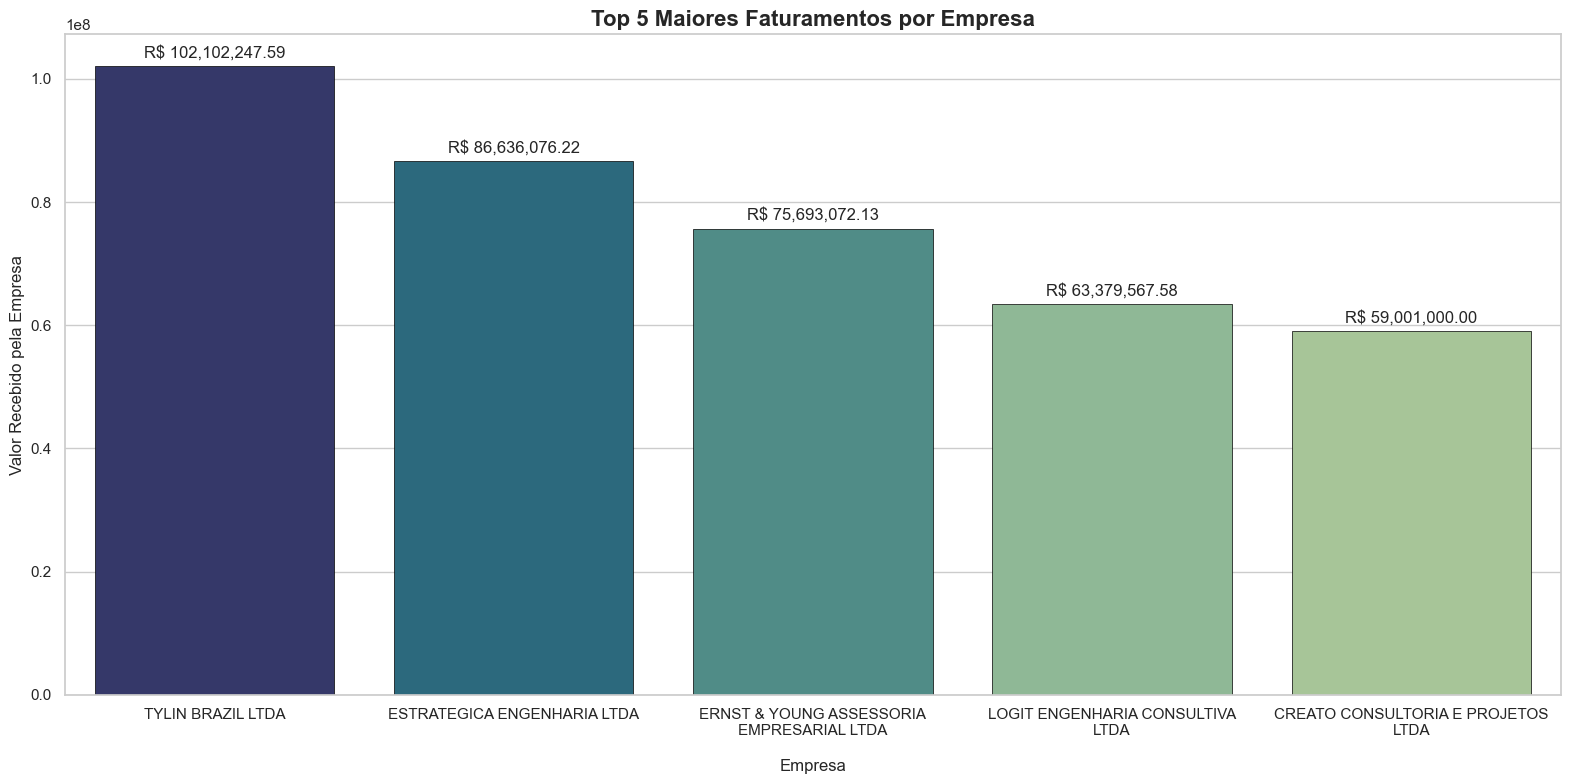

In [18]:
# Tratando possíveis duplicatas dentro do mesmo contrato
df_unicos = df.drop_duplicates(subset=['empresa', 'numero_srm', 'numero_ocs', 'nome_projeto'], keep='first')

# Agrupando o DataFrame pela coluna 'empresa' e somando a coluna 'valor_recebido_por_empresa'
faturamento_por_empresa = df_unicos.groupby('empresa')['valor_recebido_por_empresa'].sum()
top_5_empresas = faturamento_por_empresa.sort_values(ascending=False).head(5)

# print(top_5_empresas)

nomes_originais = top_5_empresas.index
wrap_width = 30 
nomes_formatados = [textwrap.fill(nome, width=wrap_width) for nome in nomes_originais]

dados_para_plot = top_5_empresas.copy()
dados_para_plot.index = nomes_formatados


plt.figure(figsize=(16, 8))

grafico = sns.barplot(
        x=dados_para_plot.index,
        y=dados_para_plot.values,
        hue=dados_para_plot,
        palette='crest',
        edgecolor='black',
        linewidth=0.5,
        errorbar=None
)

for container in grafico.containers:
    grafico.bar_label(container, fmt='R$ {:,.2f}', padding=4)

grafico.legend_.remove()
plt.title('Top 5 Maiores Faturamentos por Empresa', fontsize=16, fontweight='bold')
plt.ylabel('Valor Recebido pela Empresa', fontsize=12)
plt.xlabel('Empresa', fontsize=12, labelpad=15)
plt.tight_layout() 
plt.show()